In [1]:
import numpy as np
import astropy
import math
import yt
from yt.units import Msun, pc, kpc, Mpc, km, s, Gyr, Kelvin, g, cm, Myr
import matplotlib.pyplot as plt

In [2]:
H0 = 0.677699966430664E+02
G = 6.67408e-8
omega_b=0.450000017881393E-01
#a: scale factor
hv_alpha = 3.028114e-19
m_p = 1.6726219E-27 
#Mpc_unit = Mpc.in_units("cm")

In [3]:
rho = np.load('rho.npy')
x_ion = np.load('xion.npy')
temp = np.load('temp.npy')
# vector = np.vectorize(np.int_) 
# TEMP = vector(temp) => keep crashing. Taking a long time and then 

In [4]:
scale = np.load('scale_factor.npy')

In [9]:
def recomb_coef (T):
    v = 2.59E-13*(T/10E3)**(-0.833-0.034*math.log(T/10E3))
    print (v)

In [10]:
recomb_coef (10000) #recomb_coef is alpha-beta (T) => Recombination Coefficient

2.59e-13


In [20]:
def L_rec (T, rho, x_ion):
    l_values_x = []
    l_values_y = []
    l_values_z = []
    for i in range(len(T)):
        l_x = hv_alpha * 1.17E-13*(T[i][0][0]/10E3)**(-0.942-0.031*math.log(T[i][0][0]/10E3))*1e-6*(rho[i][0][0]/m_p)*x_ion[i][0][0]
        l_values_x.append(l_x)
        l_y = hv_alpha * 1.17E-13*(T[0][i][0]/10E3)**(-0.942-0.031*math.log(T[0][i][0]/10E3))*1e-6*(rho[0][i][0]/m_p)*x_ion[0][i][0]
        l_values_y.append(l_y) 
        l_z = hv_alpha * 1.17E-13*(T[0][0][i]/10E3)**(-0.942-0.031*math.log(T[0][0][i]/10E3))*1e-6*(rho[0][0][i]/m_p)*x_ion[0][0][i]
        l_values_z.append(l_z)
    return np.array(l_values_x), np.array(l_values_y), np.array(l_values_z)

"""From L_x_Rec equation. This is just preliminary equation and might not be correct. 
hv_alpha * P_B,X(T,n_e) * alpha_B(T) * n_e * n_p (Equation 1)
Assuming alpha_eff = P_B * alpha_B => P_B = alpha_eff / alpha_B. Thus alpha_B(T) term 
cancels out and we are left with alpha_eff, which is 1.17E-13*(T/10E3)**(-0.942-0.031*math.log(T/10E3)).
1e-6*(rho/m_p)*x_ion term is for the n_e*n_p""" 

'From L_x_Rec equation. This is just preliminary equation and might not be correct. \nhv_alpha * P_B,X(T,n_e) * alpha_B(T) * n_e * n_p (Equation 1)\nAssuming alpha_eff = P_B * alpha_B => P_B = alpha_eff / alpha_B. Thus alpha_B(T) term \ncancels out and we are left with alpha_eff, which is 1.17E-13*(T/10E3)**(-0.942-0.031*math.log(T/10E3)).\n1e-6*(rho/m_p)*x_ion term is for the n_e*n_p'

In [21]:
L_rec_1 = L_rec(temp,rho,x_ion)

In [23]:
L_rec_x = L_rec_1[0]
L_rec_y = L_rec_1[1]
L_rec_z = L_rec_1[2]

In [24]:
L_rec_xaxis = list(range(1, 1025))

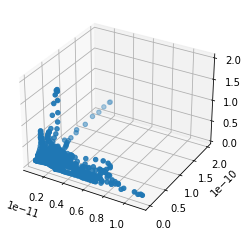

In [28]:
ax = plt.axes(projection='3d')
ax.scatter3D(L_rec_x, L_rec_y, L_rec_z, cmap='Greens');